# Pretrained model

In [1]:
import json
import keras_cv
import keras_core as keras
import numpy as np

Using TensorFlow backend


/Users/frazerhogg/Development /Udemy/ML Computer Vision /Image Classification, Fine-Tuning, and Transerfer Learning/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = keras_cv.models.ImageClassifier.from_preset("efficientnetv2_b0_imagenet_classifier")

99324/99324 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step       


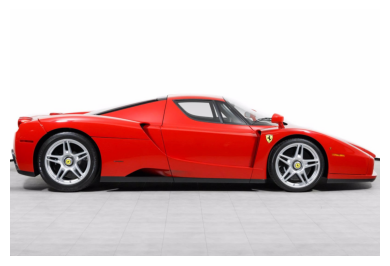

In [28]:
# picture_url = 'https://i.redd.it/twpfhcw58xgb1.jpg'
# picture_url = 'https://i.redd.it/wesj3zzk9jz31.jpg'
picture_url = "https://preview.redd.it/lzw2npz2wuu71.jpg?auto=webp&s=adc033547ba31b50c752f003d2b6f752a4d44a18"
file_path = keras.utils.get_file(origin=picture_url)
image = keras.utils.load_img(file_path)
image = np.array(image)
h, w, c = image.shape
image_batch = image.reshape((1, h, w, c))
keras_cv.visualization.plot_image_gallery(
    image_batch,
    rows=1,
    cols=1,
    value_range=(0, 255),
    show=True,
    scale=4
)

In [29]:
probs = model.predict(image_batch)
print(probs.shape)



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step
(1, 1000)


In [30]:
top_classes = (-probs[0]).argsort()

In [31]:
top_classes[:5]

array([479, 817, 511, 746, 908])

In [32]:
url = 'https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/kerascv/imagenet_label_names.json'
label_names_path_filepath = keras.utils.get_file(origin=url)
with open(label_names_path_filepath) as f:
    label_names = json.load(f)

In [33]:
label_names

['tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead shark',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house finch',
 'junco',
 'indigo bunting',
 'American robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'American dipper',
 'kite',
 'bald eagle',
 'vulture',
 'great grey owl',
 'fire salamander',
 'smooth newt',
 'newt',
 'spotted salamander',
 'axolotl',
 'American bullfrog',
 'tree frog',
 'tailed frog',
 'loggerhead sea turtle',
 'leatherback sea turtle',
 'mud turtle',
 'terrapin',
 'box turtle',
 'banded gecko',
 'green iguana',
 'Carolina anole',
 'desert grassland whiptail lizard',
 'agama',
 'frilled-necked lizard',
 'alligator lizard',
 'Gila monster',
 'European green lizard',
 'chameleon',
 'Komodo dragon',
 'Nile crocodile',
 'American alligator',
 'triceratops',
 'worm snake',
 'ring-necked snake',
 'eastern hog-nosed snake',
 'smooth green snake',
 'kingsnake',
 'garter snake',
 'water snake',
 'vin

In [34]:
for c in top_classes[:5]:
    print(label_names[c])


car wheel
sports car
convertible
hockey puck
wing
